# Nonnegative matrix factorization

A derivative work by Judson Wilson, 6/2/2014.    
Adapted from the CVX example of the same name, by Argyris Zymnis, Joelle Skaf and Stephen Boyd

## Introduction

We are given a matrix $A \in \mathbf{\mbox{R}}^{m \times n}$ and are interested in solving the problem:
    \begin{array}{ll}
    \mbox{minimize}   & \| A - YX \|_F \\
    \mbox{subject to} & Y \succeq 0 \\
                      & X \succeq 0,
    \end{array}
where $Y \in \mathbf{\mbox{R}}^{m \times k}$ and $X \in \mathbf{\mbox{R}}^{k \times n}$.

This example generates a random matrix $A$ and obtains an
*approximate* solution to the above problem by first generating
a random initial guess for $Y$ and then alternatively minimizing
over $X$ and $Y$ for a fixed number of iterations.

## Generate problem data

In [1]:
import cvxpy as cp
import numpy as np

# Ensure repeatably random problem data.
np.random.seed(0)

# Generate random data matrix A.
m = 10
n = 10
k = 5
A = np.random.rand(m, k).dot(np.random.rand(k, n))

# Initialize Y randomly.
Y_init = np.random.rand(m, k)

## Perform alternating minimization

In [2]:
# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 30
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cp.Variable(shape=(k, n))
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cp.Variable(shape=(m, k))
        constraint = [Y >= 0]
    
    # Solve the problem.
    # increase max iters otherwise, a few iterations are "OPTIMAL_INACCURATE"
    # (eg a few of the entries in X or Y are negative beyond standard tolerances)
    obj = cp.Minimize(cp.norm(A - Y*X, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=10000)

    if prob.status != cp.OPTIMAL:
        raise Exception("Solver did not converge!")
    
    print('Iteration {}, residual norm {}'.format(iter_num, prob.value))
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 2.765375656780594
Iteration 2, residual norm 0.4702952510192831
Iteration 3, residual norm 0.32468223295217946
Iteration 4, residual norm 0.16766115965494036
Iteration 5, residual norm 0.11966078799850194
Iteration 6, residual norm 0.0955226153242161
Iteration 7, residual norm 0.07710177974128414
Iteration 8, residual norm 0.06371531185679373
Iteration 9, residual norm 0.052314854204695546
Iteration 10, residual norm 0.04360850227591085
Iteration 11, residual norm 0.03655649199669773
Iteration 12, residual norm 0.03111183686351317
Iteration 13, residual norm 0.026619249133757343
Iteration 14, residual norm 0.023042708255002018
Iteration 15, residual norm 0.02014671894286064
Iteration 16, residual norm 0.017850043964129075
Iteration 17, residual norm 0.015991156868722083
Iteration 18, residual norm 0.014364203314258804
Iteration 19, residual norm 0.013284602184854465
Iteration 20, residual norm 0.012095501895322897
Iteration 21, residual norm 0.011535153475650

## Output results

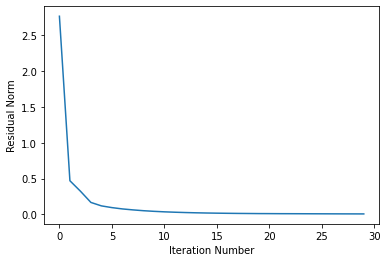

Original matrix:
[[1.323426   1.11061189 1.69137835 1.20020115 1.13216889 0.5980743
  1.64965406 0.340611   1.69871738 0.78278448]
 [1.73721109 1.40464204 1.90898877 1.60774132 1.53717253 0.62647405
  1.76242265 0.41151492 1.8048194  1.20313124]
 [1.4071438  1.10269406 1.75323063 1.18928983 1.23428169 0.60364688
  1.63792853 0.40855006 1.57257432 1.17227344]
 [1.3905141  1.33367163 1.07723947 1.67735654 1.33039096 0.42003169
  1.22641711 0.21470465 1.47350799 0.84931787]
 [1.42153652 1.13598552 2.00816457 1.11463462 1.17914429 0.69942578
  1.90353699 0.45664487 1.81023916 1.09668578]
 [1.60813803 1.23214532 1.73741086 1.3148874  1.27589039 0.40755835
  1.31904948 0.3469129  1.34256526 0.76924618]
 [0.90607895 0.6632877  1.25412229 0.81696721 0.87218892 0.50032884
  1.245879   0.25079329 1.25017792 0.72155621]
 [1.5691922  1.47359672 1.76518996 1.66268312 1.43746574 0.72486628
  1.97409333 0.39239642 2.09234807 1.16325748]
 [1.18723548 1.00282008 1.41532595 1.03836298 0.90382914 0.38460

In [3]:
#
# Plot residuals.
#
import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

#
# Print results.
#
print('Original matrix:')
print(A)
print('Left factor Y:')
print(Y)
print('Right factor X:')
print(X)
print('Residual A - Y * X:')
print(A - Y.dot(X))
print('Residual after {} iterations: {}'.format(iter_num, prob.value))
